# Assignment 4: PCA

In this assignment you will explore Principal Component Analysis (PCA) in two datasets: a set of 2D points and a collection of face images.

There are hidden tests within this assignment to grade the accuracy of your work. <br>

**PLEASE DO NOT CHANGE THE NAME OF THIS FILE OR ADD/DELETE THE CELLS.**

Run the following cell to import the appropriate libraries:

In [1]:
import numpy as np
import scipy.io as sio
import matplotlib
import matplotlib.pyplot as plt
from numpy.matlib import repmat
from sklearn.preprocessing import normalize

## PART 1: `hw4data.mat`

For questions 1 through 3, you will work with `hw4data.mat` 

`hw4data.mat` is a set of 100, 2-D data vectors arranged as columns in the matrix. 

Run the following cell to load the data:

In [2]:
hw4data = np.loadtxt('hw4data.mat')

## Q1: Data Visualization

Run the following cell to make a scatterplot of the samples. Then:

1. Find the sample mean using numpy.mean. Transform the returned 1D numpy array to a 2D numpy column vector and store it in `mean`. Note the mean should have shape (2, 1).

2. Find the sample covariance matrix (and write it down in the document) using the formula $\frac{1}{n}ZZ^T$ where $Z$ is the matrix of mean subtracted data points and store it in `cov`. You may not use built-in function for covariance. Check that your covariance matrix has the correct dimensionality .

In [3]:
plt.scatter(hw4data[0, :], hw4data[1, :], marker='.')
plt.title('Original Scatterplot')
mean = np.mean(hw4data, axis=1)[:,np.newaxis]
Z = hw4data - mean
n = Z.shape[1]
cov = (1/n) * (Z.dot(Z.T))
# YOUR CODE HERE


In [4]:
assert mean.shape == (2, 1)
assert cov.shape == (2, 2)


## Q2: Eigenvalues and Eigenvectors

For this part, you are provided the following `eigsort` helper function

In [5]:
def eigsort(V, eigvals):
    # [Vsort,Dsort] = eigsort(V, eigvals)
    #
    # Sorts a matrix eigenvectors and a array of eigenvalues in order 
    # of eigenvalue size, largest eigenvalue first and smallest eigenvalue
    # last.
    #
    # Example usage:
    # di, V = np.linarg.eig(L)
    # Vnew, Dnew = eigsort(V, di)
    #
    # Tim Marks 2002
    
    # Sort the eigenvalues from largest to smallest. Store the sorted
    # eigenvalues in the column vector lambd.
    lohival = np.sort(eigvals)
    lohiindex = np.argsort(eigvals)
    lambd = np.flip(lohival)
    index = np.flip(lohiindex)
    Dsort = np.diag(lambd)
    
    # Sort eigenvectors to correspond to the ordered eigenvalues. Store sorted
    # eigenvectors as columns of the matrix vsort.
    M = np.size(lambd)
    Vsort = np.zeros((M, M))
    for i in range(M):
        Vsort[:,i] = V[:,index[i]]
    return Vsort, Dsort

Using the `np.linalg.eig` command, find the eigenvectors and eigenvalues of the sample covariance matrix and store them in `eigvals` and `V_old` respectively

In [6]:
eigvals, V_old = np.linalg.eig(cov)

# YOUR CODE HERE

print(V_old)
print(eigvals)

[[-0.82431958 -0.56612474]
 [ 0.56612474 -0.82431958]]
[19.17016342 67.49058962]


In [7]:
assert eigvals.shape == (2,)
assert V_old.shape == (2, 2)

assert np.all(eigvals >= 0)
assert np.allclose(V_old.T @ V_old, np.eye(2))


What is the eigenvector corresponding to the largest eigenvalue?

- A. $[-0.82431958 -0.56612474]^T$

- B. $[0.56612474 -0.82431958]^T$

In [8]:
Q2_ans_1 = 'B'
# YOUR CODE HERE


In [9]:
assert Q2_ans_1 in ['A', 'B']

What is the eigenvector corresponding to the smallest eigenvalue?

- A. [-0.82431958 -0.56612474]

- B. [ 0.56612474 -0.82431958]

In [10]:
Q2_ans_2 = 'A'
# YOUR CODE HERE


In [11]:
assert Q2_ans_2 in ['A', 'B']

Use the `eigsort` function that we provide to sort the eigenvectors and eigenvalues in order of largest
eigenvalue to smallest eigenvalue and store them in `V` and `D` respectively. 

If the matrix $V_{old}$ is the eigenvectors and the array `eigvals` stores
the eigenvalues, the syntax for eigsort is $V_{sort}, D_{sort} = eigsort(V_{old}, eigvals)$

In [12]:
V, D = eigsort(V_old, eigvals)
# YOUR CODE HERE

print(V)
print(D)

[[-0.56612474 -0.82431958]
 [-0.82431958  0.56612474]]
[[67.49058962  0.        ]
 [ 0.         19.17016342]]


In [13]:
assert V.shape == (2,2)
assert D.shape == (2,2) and D[0, 1] == 0 and D[1, 0] == 0.0


Run the following cells to visualize `V_old` and `V`

In [14]:
plt.imshow(V_old)

In [15]:
plt.imshow(V)

Looking at the two graphs, which is true?

- A. The rows are reordered
- B. The columns are reordered

In [16]:
Q2_ans_3 = 'B'
# YOUR CODE HERE


In [17]:
assert Q2_ans_3 in ['A', 'B']

## Q3: PCA Transformation

The PCA transformation of a point consists of subtracting the mean and multiplying by the transpose of the matrix of eigenvectors of the covariance matrix. $c = V' \ast (x - \text{mean})$. This is just re-representing the point in a new data-aligned coordinate system. <br><br>

Consider the point $\begin{bmatrix}-35 \\ 40 \end{bmatrix}$ in the original coordinate system. What are its coordinates in the new
coordinate system found by PCA (i.e., what are the principal component coordinates of the point)? Store this in `new_coords`.

In [18]:
new_coords = V.T.dot(np.array([[-35], [40]]) - mean)
# YOUR CODE HERE
print(new_coords)

[[14.1460219 ]
 [ 3.88404151]]


In [19]:
assert new_coords.shape == (2,1)
assert (10 < new_coords[0] < 20)

Transform all 100 sample points with the PCA transformation and store it in `C` (you can do this with one big matrix multiplication ( $C = V' \ast Z$ where C is a matrix with columns containing the principal component coordinates of the points, Z is a matrix with columns containing the mean subtracted data points, and V is the matrix of sorted eigenvectors) or in a loop using the equation used above).

In [20]:
C = V.T.dot(Z)

# YOUR CODE HERE
plt.scatter(C[0, :], C[1, :], marker='.') # Plot points in new coordinate system
plt.title('Transformed Scatterplot')

Text(0.5, 1.0, 'Transformed Scatterplot')

In [21]:
assert 2e-15 < C[0].mean(axis=0) < 10e-15
assert C.shape == (2, 100)


How does the original scatterplot compare with the transformed scatterplot? (What kind of transformation takes you from original scatterplot to transformed scatterplot)?

- A. Translation only
- B. Rotation and Reflection
- C. Rotation only

In [22]:
Q3_ans_1 = 'B'
# YOUR CODE HERE


In [23]:
assert Q3_ans_1 in ['A', 'B', 'C']

## PART 2: `hw4bdata.mat`

For questions 4 through 8, you will work with `hw4bdata.mat`. Run the following cell to load the data:

In [24]:
hw4bdata = sio.loadmat('hw4bdata.mat')
faces = hw4bdata['faces']
dog = hw4bdata['dog']
x = hw4bdata['x']

The matrix faces contains 48 face images. These are images of 16 people in 3 different lighting conditions. Each column of faces is a 60x60 face image. 

These are the same faces that were used in Turk and Pentland’s original paper on eigenfaces and the ones used in the demo of faceexample09.m (but different than the ones in the lecture slides). Feel free to look at the faceexample09.m code posted on the website for help with the various steps below.

### IMPORTANT: We use 1-based indexing in this writeup. So for example, when you are telling to view the 5th column, you might want to look at 0-based index 4

## Q4: Calculating the Eigen-faces

For this part, you are provided with the following `viewcolumn` and `normc` helper functions:

In [25]:
def viewcolumn(columnvector):
    # viewcolumn(columnvector);
    # VIEWCOLUMN Displays a 60 x 60 grayscale image stored in a column vector.
    # Tim Marks 2002
    plt.imshow(columnvector.reshape([60, 60], order='F'), cmap=plt.get_cmap('gray'))


def normc(Mat):
    # normc(M) normalizes the columns of M to a length of 1.
    return normalize(Mat, norm='l2', axis=0)

Run the following cell to use the `viewcolumn` command to view the 5th (index 4) face image, which is stored in the 5th column of the faces matrix.

In [26]:
viewcolumn(faces[:, 4])

Compute the mean face (use numpy.mean) and store it in `meanface`.

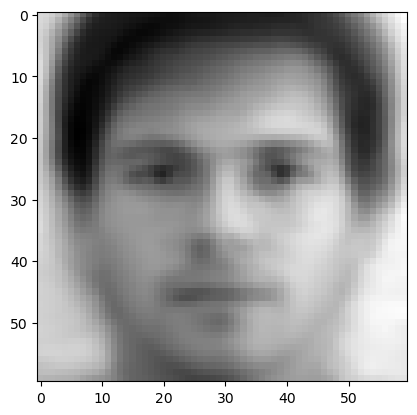

In [27]:
meanface = np.mean(faces, axis=1)

# YOUR CODE HERE
meanface = meanface[:, np.newaxis] #Transform the returned 1D numpy array to a 2D numpy column vector
viewcolumn(meanface)

In [28]:
assert meanface.shape == (3600, 1)
assert (0.5 < meanface[0] < 0.9)

In the following cell:
1. Subtract the mean from all of the data (using the command numpy.matlib.repmat), and call the matrix of mean-subtracted data `A`.

2. Use the eig command to compute the eigenvectors and eigenvalues of $A^TA$ and store them in `eigvals` and `V_old`. (Note: we are not computing the eigenvectors and eigenvalues of $AA^T$ directly because that is a very big matrix. See discussion of the transpose trick from class notes (related to question 6 from HW3).) Note that we have also dropped the $1/n$ term from the covariance matrix equation as it does not affect the eigenvectors (it just changes the eigenvalues, which are not used, by a factor of n).

3. Use `eigsort` to sort the eigenvectors and eigenvalues in order of largest to smallest eigenvalue. Store the results in `V` and `D`.

4. Use A and V to calculate `U`, the matrix of eigenfaces (the eigenvectors of $AA^T$).

In [29]:
A = faces - meanface
eigvals, V_old = np.linalg.eig(A.T.dot(A))
V, D = eigsort(V_old, eigvals)
U = A.dot(V)

# YOUR CODE HERE

In [30]:
assert A.shape == faces.shape
assert np.allclose(np.mean(A, axis=1), 0, atol=1e-5)
assert eigvals.shape == (48,)
assert V_old.shape == (48, 48)
assert V.shape == (48, 48)
assert 0.01 < V[0].mean(axis=0) < 0.04
assert D.shape == (48, 48)
assert (700 < D[0][0] < 900)
assert U.shape == (A.shape[0], V.shape[1])


Use `normc` that we provide to normalize the columns of U so they all have length 1. Reassign `U` to the output of `normc`.

In [31]:
U = normc(U)

In [32]:
assert U.shape == (A.shape[0], V.shape[1])
assert (-1 < U[0].mean(axis=0) < -0.001)

## Q5: Calculating Face Principal Components

Find the principal component coordinates of the 5th (index 4) face image in the data set.

This is just like what you did for question 4 above: (you can do this with one big matrix multiplication ( $C = U' \ast Z$ where C is a matrix with columns containing the principal component coordinates of the points, Z is a matrix with columns containing the mean subtracted data points, and U is the matrix of sorted eigenvectors))

Call the vector of principal component coordinates `c`.

In [33]:
face4 = faces[:, 4][:, np.newaxis] - meanface
c = U.T.dot(face4)
# YOUR CODE HERE

c.shape, c[0][0], U.shape, face4.shape

((48, 1), 0.5948422171529686, (3600, 48), (3600, 1))

In [34]:
assert c.shape == (48, 1)
assert 0.1 < c[0][0] < 0.9

## Q6: Reconstructing Faces

Run the following cell display the 3rd (index 2) eigenface using the viewcolumn command.

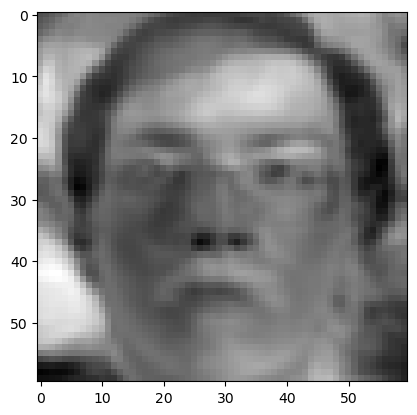

In [35]:
viewcolumn(U[:, 2])


Reconstruct the 5th face using all 48 principal components, store it in `Zhat`, and view it with `viewcolumn`. (Remember that $\hat{z} = U_{\text{reduced}} \ast c_{\text{reduced}} + \text{meanface}$
) where $U_{\text{reduced}}$ has as columns of the principal component
directions that you wish to use and $c_{\text{reduced}}$ has the corresponding principal component coordinates). (For all reconstructions, remember to add back the mean face!) (Save as hw4G2.jpg and put in the document)

In [36]:
Zhat = U.dot(c) + meanface
# YOUR CODE HERE

viewcolumn(Zhat)

In [37]:
assert Zhat.shape == (3600, 1)
assert (0.1 < Zhat.mean(axis=0)[0] < 0.8)

Reconstruct the 5th face using only the first 10 principal components, store it in `Zhat_2`, and view it with `viewcolumn`. (Save as hw4G3.jpg and put in the document)

In [38]:
Zhat_2 = U[:,:10].dot(c[:10,]) + meanface
# YOUR CODE HERE

viewcolumn(Zhat_2)

In [39]:
assert Zhat_2.shape == (3600, 1)
assert (0.1 < Zhat_2.mean(axis=0)[0] < 0.8)

## Q7: Non-face Image Projection

**Please complete the following for points:**

Let’s explore what happens when a non-face image is projected into face space.
1. The vector dog contains a 60x60 picture of a dog. Display the picture of the dog. 

In [40]:
viewcolumn(dog)

2. Using the eigenfaces you found (Do **NOT** recompute the eigenfaces), find the principal component
coordinates of the dog image (Type the Python command into the document $c = U' \ast (dog - meanface)$). This gives the coordinates of the dog image in the face-aligned space.

3. Reconstruct the dog picture using all 48 principal components, and display the image. This is the best reconstruction of the dog image in the face space. (Remember to add back in the meanface)

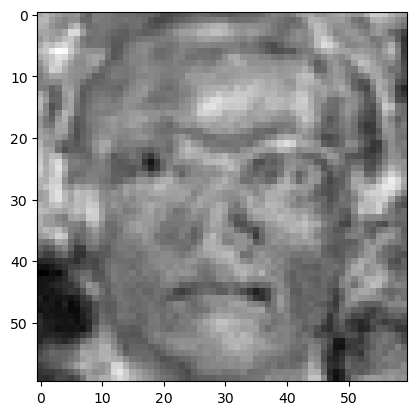

In [41]:
c = U.T.dot(dog - meanface)
Zhat = U.dot(c) + meanface

# YOUR CODE HERE

viewcolumn(Zhat)

In [42]:
assert Zhat.shape == (3600, 1)
assert Zhat[24, 0] > 0.8 and Zhat[24, 0] < 0.9
assert Zhat[190, 0] > 0.7 and Zhat[190, 0] < 0.8
assert Zhat[590, 0] > 0.3 and Zhat[590, 0] < 0.4


4. Does the reconstructed dog look like the original picture? Explain why the reconstruction looks the way
it does.

YOUR ANSWER HERE: The reconstructed dog image looks more like a human face, since all the images that we build the model on was based on human faces. 

## Q8: Generalization on Excluded Faces

**Please complete the following tasks for points:**

Columns 1–3 of faces contain the three images of person 1, columns 4–6 contain the three images of person
2, and so on, all the way up to columns 46–48, which contain the three images of person 16. You will explore how well the face space generalizes to new people who weren’t in the data set.

1. Choose one of the 16 people (3 of the 48 images) to exclude, and calculate the eigenfaces using only the
remaining 15 people (45 images). 

In [43]:
person_number_to_exclude = 1 # set this to any number from 0 to 15
faces_to_exclude = np.s_[person_number_to_exclude*3:person_number_to_exclude*3+3]
newfaces = np.delete(faces,faces_to_exclude,axis=1)

In [44]:
person_number_to_exclude = 6
faces_to_exclude = np.s_[person_number_to_exclude*3:person_number_to_exclude*3+3]
newfaces = np.delete(faces,faces_to_exclude,axis=1)

2. Choose one of the images of the excluded 16th person, and display the image.

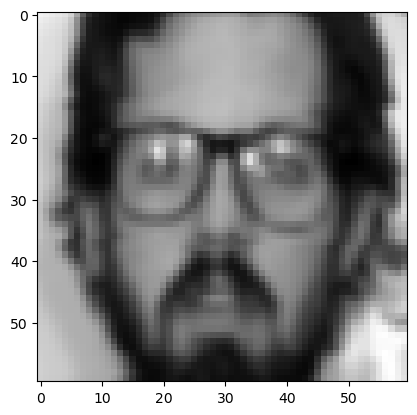

In [45]:
viewcolumn(faces[:, person_number_to_exclude*3])

3. Use the eigenfaces you found in part (1) to calculate the principal components of the image you chose in
part (2). Reconstruct the image using all 45 of its principal components, and display the output.

In [48]:
meannewface = np.mean(newfaces, axis=1)[:,np.newaxis]
B = faces - meannewface
# eigvals, Vold = ...
eigenvals, Vold = np.linalg.eig(B.T.dot(B))
# V, D = ...
V, D = eigsort(Vold, eigenvals)
U = B.dot(V)

# YOUR CODE HERE


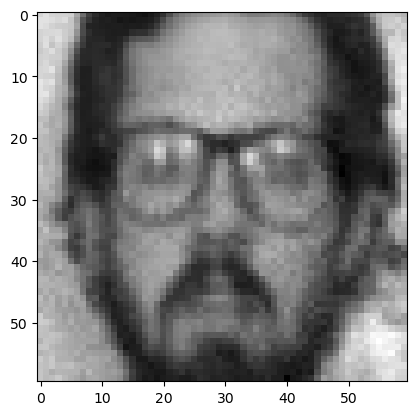

In [52]:
U = normc(U)
face4 = faces[:,18][:, np.newaxis] - meannewface
c = U.T.dot(face4)
Zhat = U.dot(c) + meannewface

# YOUR CODE HERE

viewcolumn(Zhat)

4. Based on steps (1)–(3), how well do you think the face space represents faces that were not in the
original data set?

YOUR ANSWER HERE: I think the face space represented the non-represented face well, in that I can could easily identify the constructed face as being the original face. However, the reconstructed face is in much lower quality, which makes sense because any features that are unique to this person would not be represented in the mean, and would have to be reconstructed alone with the eigenface for this person. 

## The End of HW4P!

This is the end of the HW4P.

Have a look back over your answers, and also make sure to `Restart Kernel And Run All Cells` from the kernel menu to double check that everything is working properly. This restarts everything and runs your code from top to bottom.

Once you're happy with your work, click the disk icon to save, and submit onto DataHub. **You MUST submit all the required component to receive credit**.

Note that you can submit at any time, but we grade your **most recent submission**. This means that **if you submit an updated notebook after the submission deadline, it will be marked as late**.